In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [10]:
X=np.random.rand(1000,1)
y=3*X+4 + np.random.normal(0,0.2,(1000,1))


Text(0, 0.5, 'y')

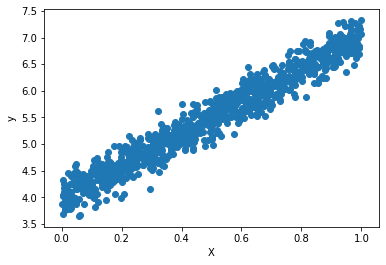

In [12]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

In [20]:
# y= w0*1 + w1*x  or  y=w.T*X
ones= np.ones((X.shape[0],1))
Xbar=np.concatenate((ones,X), axis=1)
N=len(y)

In [30]:
# Derivative of loss function
def derivative(w):
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

In [23]:
def loss(w):
    return 0.5/N*np.linalg.norm(y-Xbar.dot(w),2)**2

In [31]:
def GD(w_init, eta):
    w=[w_init]
    for i in range(100):
        w_new = w[-1] - eta*derivative(w[-1])
        if np.linalg.norm(derivative(w_new))/len(w_new)<1e-3:
            break
        w.append(w_new)
    return w,i
    

# Change w_init and eta to optimize 

In [80]:
w_init=np.array([[0],[1]]) 
w,it=GD(w_init,1)
print('Solution found by my DG: ', w[-1].T)
print('with %d iteraters'%(it+1))
print('Best result loss:',loss(w[-1]))

Solution found by my DG:  [[3.96697565 3.06158079]]
with 10 iteraters
Best result loss: 0.02012109826177946


Text(0, 0.5, 'y')

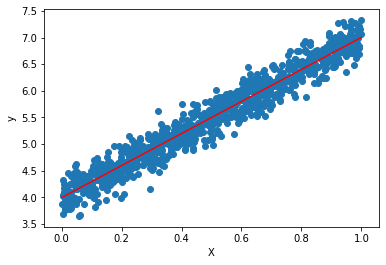

In [55]:
#plot 
w0=w[-1][0,0]
w1=w[-1][1,0]
x0=np.array([0,1])
y0=x0*w1+w0

plt.scatter(X,y)
plt.plot(x0,y0, 'r')
plt.xlabel('X')
plt.ylabel('y')

# Check  Derivative True or False?

In [63]:
def numerical_gradient(w,loss):
    eps=1e-4
    result=np.zeros_like(w)    
    for i in range(len(w)):
        w_p=np.copy(w)
        w_s=np.copy(w)
        w_p[i]+=eps
        w_s[i]-=eps
        result[i]=(loss(w_p)-loss(w_s))/(2*eps)
    return result

In [64]:
def checkDer(w,loss,derivative):
    w=np.random.rand(w.shape[0],w.shape[1])
    g1=derivative(w)
    g2=numerical_gradient(w,loss)
    return np.linalg.norm(g2-g1)<1e-6

In [65]:
print('my derivative is: ', checkDer(np.random.rand(2,1),loss,derivative))

my derivative is:  True
